In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve



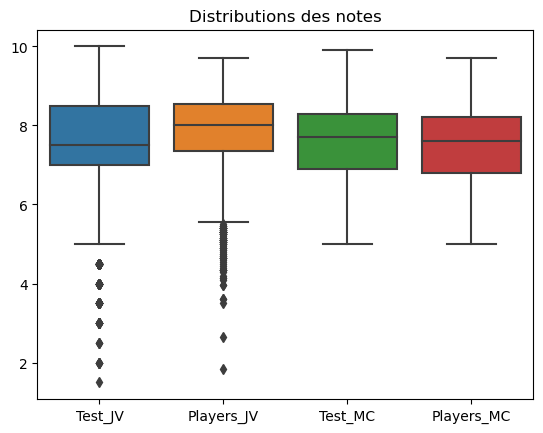

In [6]:
# Etude de la distribution des notes

df = pd.read_csv('metacritic_jeuxvideos.csv')
df = df.dropna()
df['Test_JV'] = (df['Test_JV']/2).round(2)
df['Players_JV'] = (df['Players_JV']/2).round(2)
df['Test_MC'] = (df['Test_MC'] / 10).round(2)
sns.boxplot(df)
plt.title('Distributions des notes');

/tmp/ipykernel_78541/220682705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap='cividis');


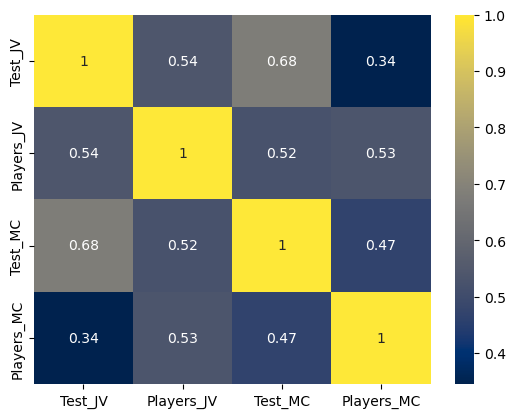

In [7]:
# Matrice de corrélation

sns.heatmap(df.corr(), annot = True, cmap='cividis');

/tmp/ipykernel_78541/2095067990.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap=cmap);


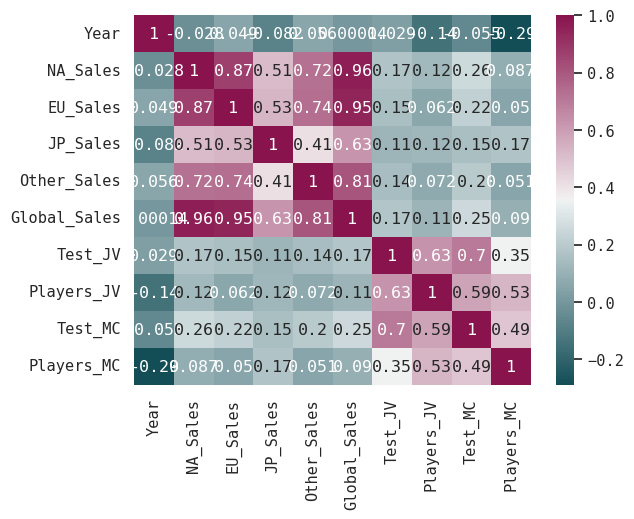

In [16]:
# Matrice de corrélation du DF final
df = pd.read_csv('vg_mc_jv.csv', index_col = 'Name')
df = df.dropna()
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(df.corr(), annot = True, cmap=cmap);

/tmp/ipykernel_78541/1728703146.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap);


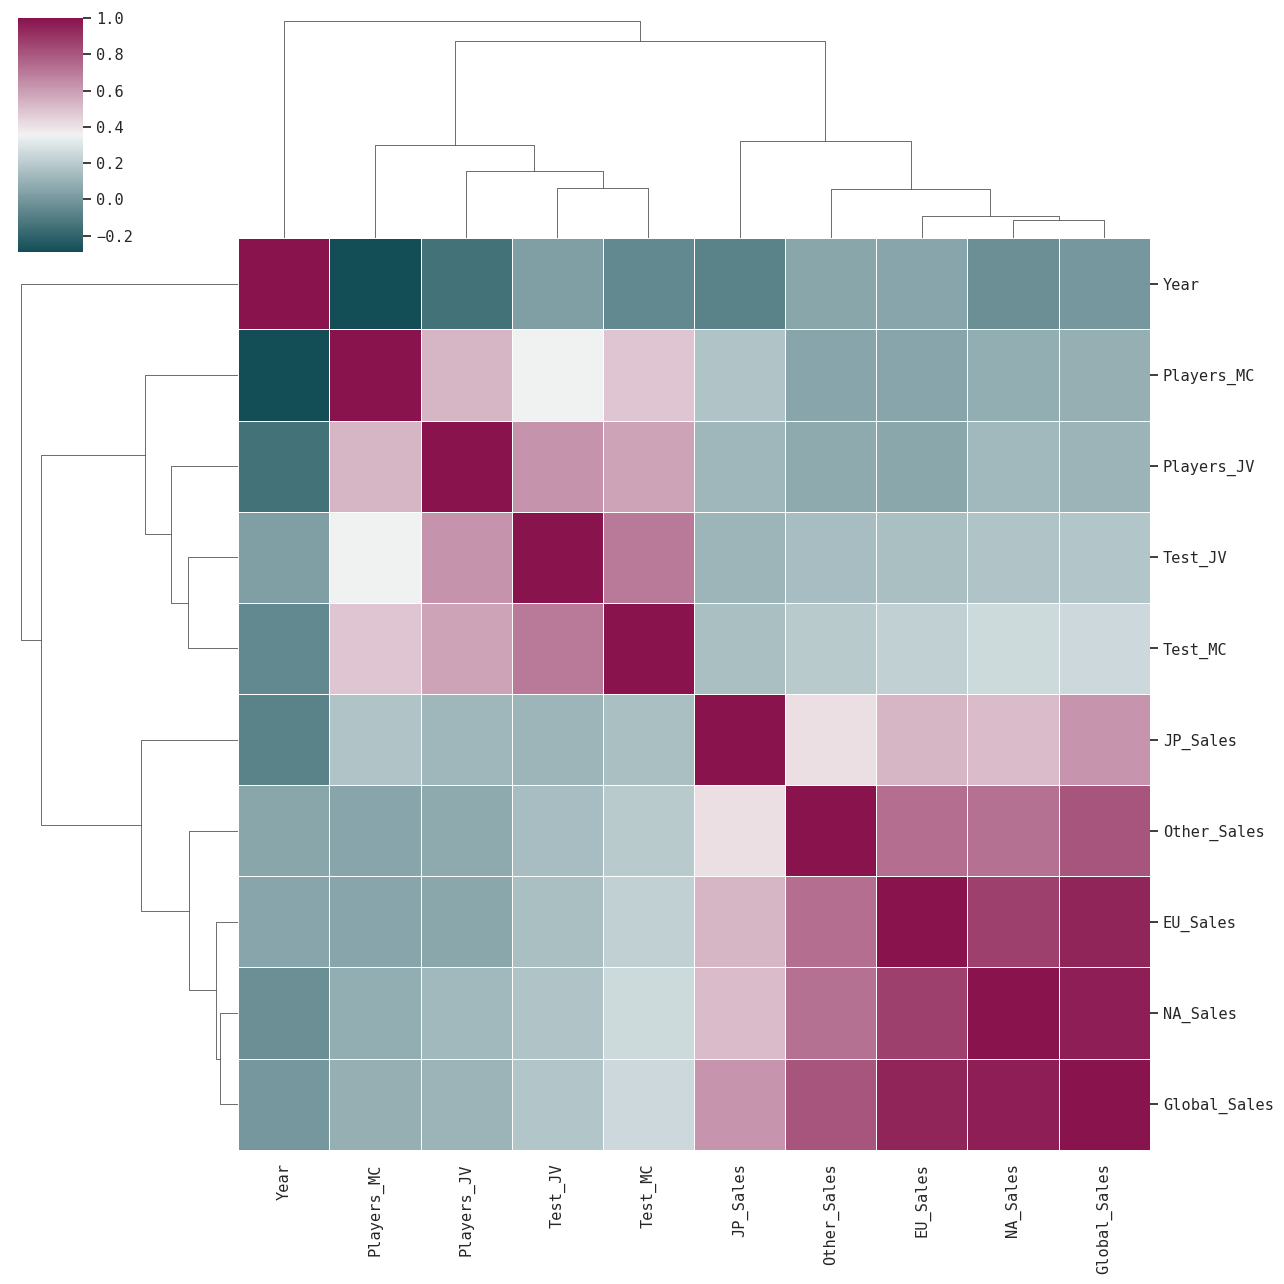

In [17]:
sns.set(font="monospace")
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(df.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap);

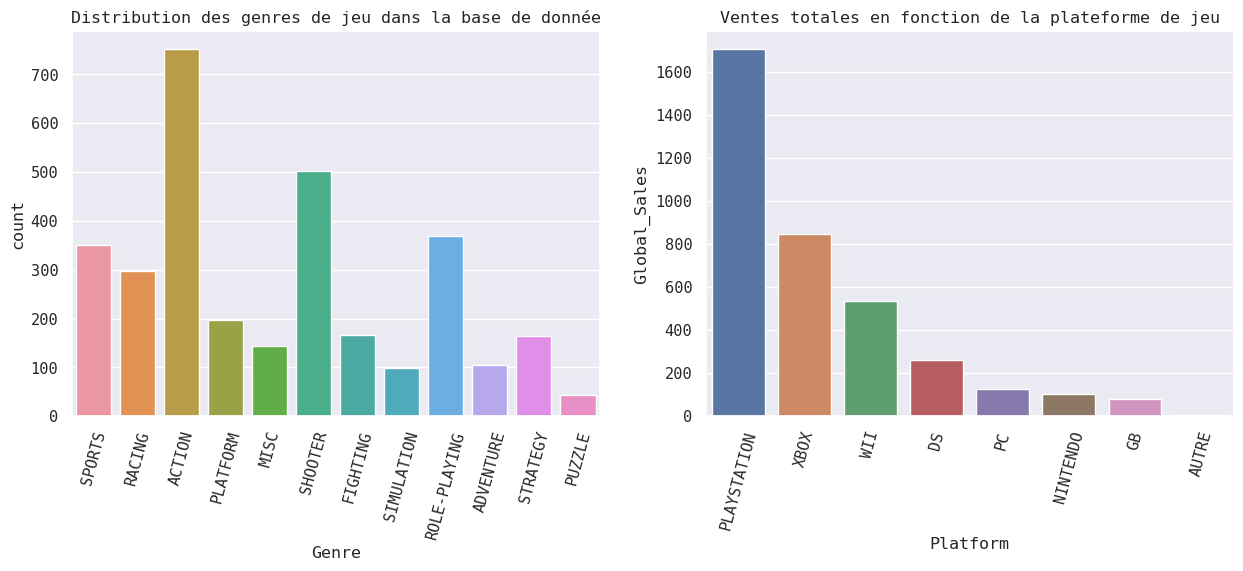

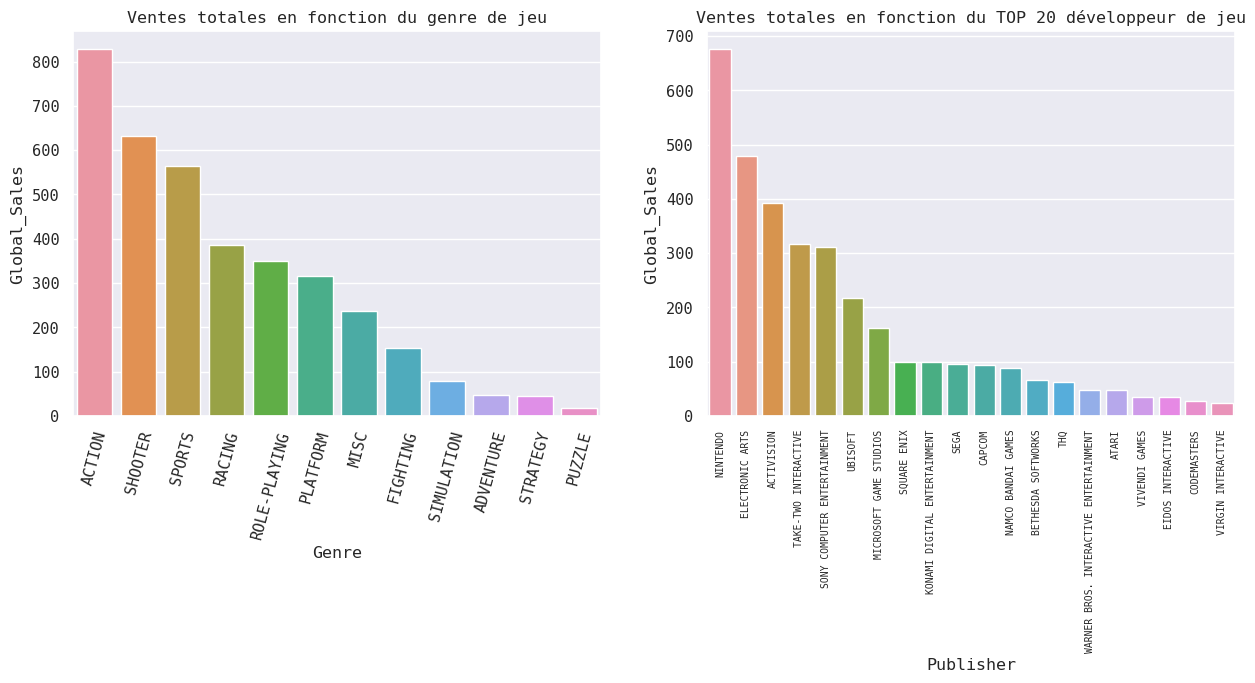

In [18]:
# Retour sur la Viz effectué en partie exploratoire mais avec le DF final (après scraping et data quality)

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x= df['Genre'])
plt.xticks(rotation = 75)
plt.title('Distribution des genres de jeu dans la base de donnée')

plt.subplot(122)
# Distribution des ventes en fonction de la plateforme de jeu
df_platform = pd.DataFrame(df.groupby(['Platform'])['Global_Sales'].sum())
df_platform_sorted = df_platform.sort_values('Global_Sales', ascending = False)
sns.barplot(x = df_platform_sorted.index, y = df_platform_sorted['Global_Sales'])
plt.xticks(rotation = 75)
plt.title('Ventes totales en fonction de la plateforme de jeu')

plt.figure(figsize=(15,5))
plt.subplot(121)
# Distribution des ventes en fonction du type de jeu
df_genre = pd.DataFrame(df.groupby(['Genre'])['Global_Sales'].sum())
df_genre_sorted = df_genre.sort_values('Global_Sales', ascending = False)
sns.barplot(x = df_genre_sorted.index, y = df_genre_sorted['Global_Sales'])
plt.xticks(rotation = 75)
plt.title('Ventes totales en fonction du genre de jeu')

plt.subplot(122)
# Distribution des ventes en fonction du distributeur
df_publisher = pd.DataFrame(df.groupby(['Publisher'])['Global_Sales'].sum())
df_publisher_sorted = df_publisher.sort_values('Global_Sales', ascending = False).head(20)
sns.barplot(x = df_publisher_sorted.index, y = df_publisher_sorted['Global_Sales'])
plt.xticks(rotation = 90, size = 7)
plt.title('Ventes totales en fonction du TOP 20 développeur de jeu');

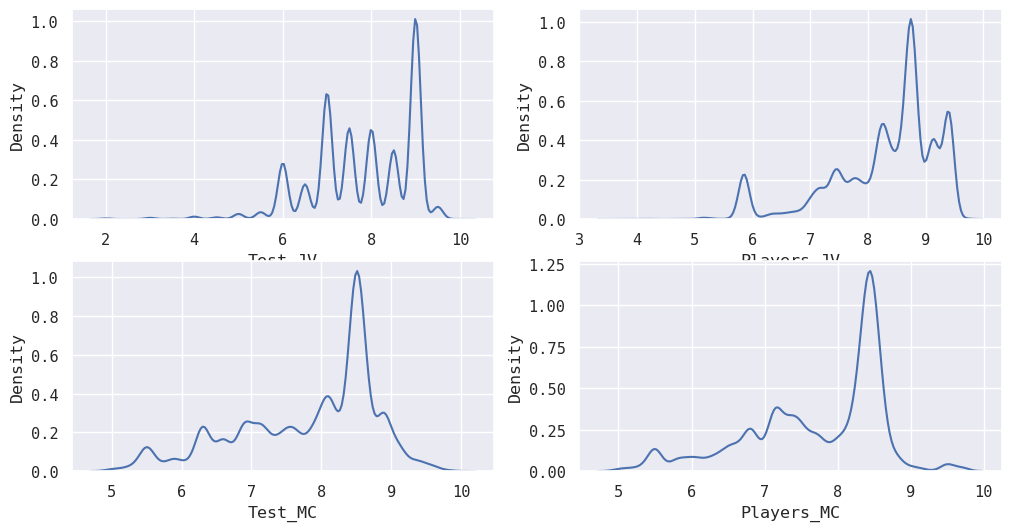

In [19]:
# Modélisation de la distribution des notes dans le DF final de modélisation

df['y'] = pd.qcut(df['Global_Sales'], q = [0, 0.25, 0.5, 0.75, 1], labels = [1,2,3,4])

# Dichotomisation des variables catégorielles
publisher = pd.get_dummies(df['Publisher'], prefix = 'publisher')
platform = pd.get_dummies(df['Platform'], prefix = 'platform')
genre = pd.get_dummies(df['Genre'], prefix = 'genre')

# Ajout des colonnes dichotomisée au DataFrame
df = df.join(publisher)
df = df.join(platform)
df = df.join(genre)

df['Test_MC'] = df['Test_MC'] / 10
df['Test_JV'] = df['Test_JV'] / 2
df['Players_JV'] = df['Players_JV'] / 2

plt.figure(figsize = (12,6))
for i,j in zip(['Test_JV', 'Players_JV','Test_MC','Players_MC'],[1,2,3,4]):
    plt.subplot(2,2,j)
    sns.kdeplot(df[i]);

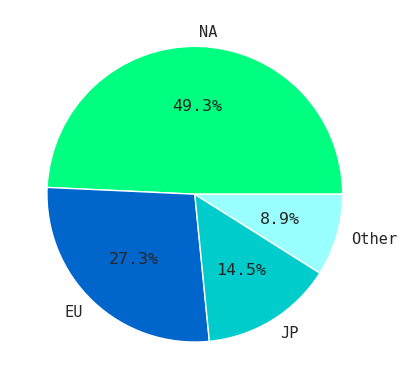

In [20]:
# Part de chaque marché dans Global_Sales

df = pd.read_csv('vg_sales_clean.csv').drop('Unnamed: 0', axis = 1)
NA = df['NA_Sales'].sum()
EU = df['EU_Sales'].sum()
JP = df['JP_Sales'].sum()
Other = df['Other_Sales'].sum()
couleurs = ['#00FF80', '#0066CC', '#00CCCC', '#99FFFF']
fig, ax = plt.subplots()
ax.pie([NA,EU,JP,Other], labels = ['NA','EU','JP','Other'],autopct='%1.1f%%',colors = couleurs);